# 训练线性模型

## 随机线性数据求解正规方程

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1) # 生成100个随机数
y= 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3*x + 满足高斯分布的一个噪声, 使得数据集不是完全线性的|

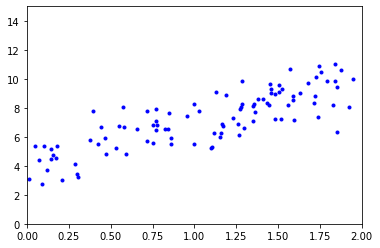

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.axis([0,2,0,15]) 
plt.show()

In [5]:
# 求解正规方程

X_b = np.c_[np.ones((100, 1)), X] # X里存放的是n个X1, 还需要加上始终为1的X0
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.15416033],
       [2.87720655]])

In [7]:
# 使用求解出来的值进行预测
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.15416033],
       [9.90857344]])

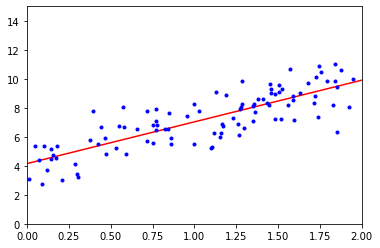

In [10]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15]) 
plt.show()

## 多项式回归

In [12]:
# 简单二次方程生成非线性数据

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

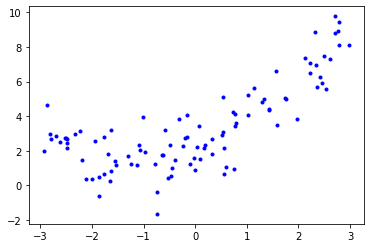

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.show()

In [14]:
# 将特征的平方作为新特征对数据集进行转换

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([0.7853822 , 0.61682521])

In [15]:
# 在新的数据集上进行线性回归

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.10946389]), array([[1.03253944, 0.44361361]]))